**Logistic Regression**


In [1]:
# Supervised Learning Algorithm
#  | - Classification
#    |- Logistic Regression

In [2]:
# 1. We have a problem statment where we have to find a email is SPAM or NO SPAM.
# 2. Now we couldn't get a linear relationship between YES or NO.
# 3. We try to find the odds of the event-
#    odd = chances in favour/ chances against 
# 4. Take a log(odd)
# 5. Probabilities have a range from 0 to 1, we need a function to convert these numbers to probability
# 6. Sigmoid - It converts any number to probability (0 to 1) 

In [3]:
import math
def sigmoid(x):
  num = 1
  deno = 1 + math.e**(-x)
  return num/deno

In [4]:
sigmoid(10)

0.9999546021312976

In [5]:
sigmoid(-100)

3.7200759760208555e-44

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [10]:
from sklearn.datasets import load_iris

In [11]:
# Types of Iris
# 1. Setosa
# 2. Virginica
# 3. Versicolor 

# Input Features
# 1. Sepal Length
# 2. Sepal Width
# 3. Petal Length
# 4. Petal Width

In [13]:
dataset = load_iris()

In [14]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
dataset.filename

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv'

In [31]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
df['target']= dataset.target

In [34]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target
48,5.3,3.7,1.5,0.2,0
22,4.6,3.6,1.0,0.2,0
50,7.0,3.2,4.7,1.4,1
6,4.6,3.4,1.4,0.3,0
148,6.2,3.4,5.4,2.3,2


In [41]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [43]:
df.shape

(150, 5)

In [44]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


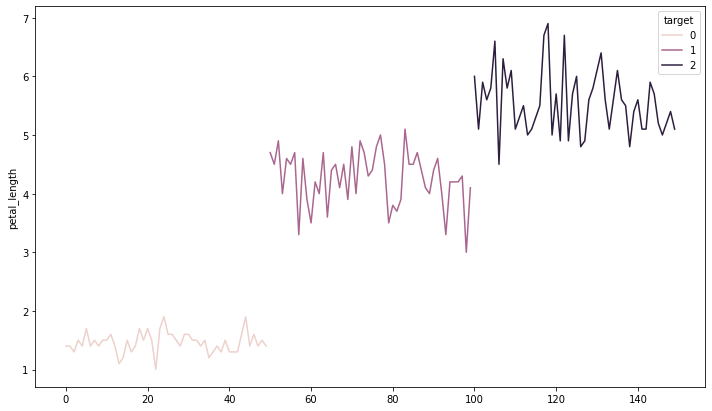

In [48]:
plt.figure(figsize=(12, 7))
sns.lineplot(x= df.index, y = df.petal_length, hue= df.target)

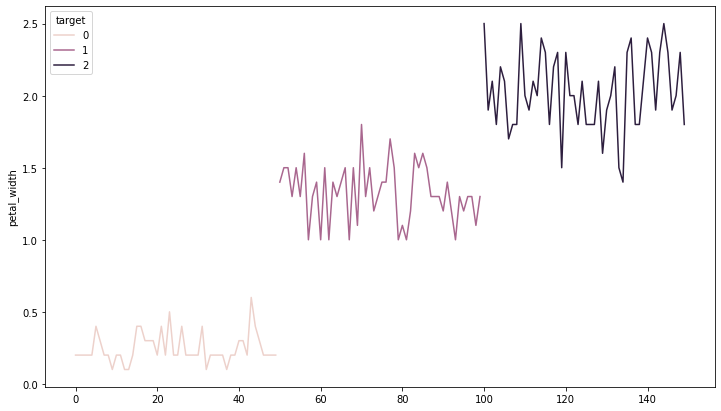

In [49]:
plt.figure(figsize=(12, 7))
sns.lineplot(x= df.index, y = df.petal_width, hue= df.target)

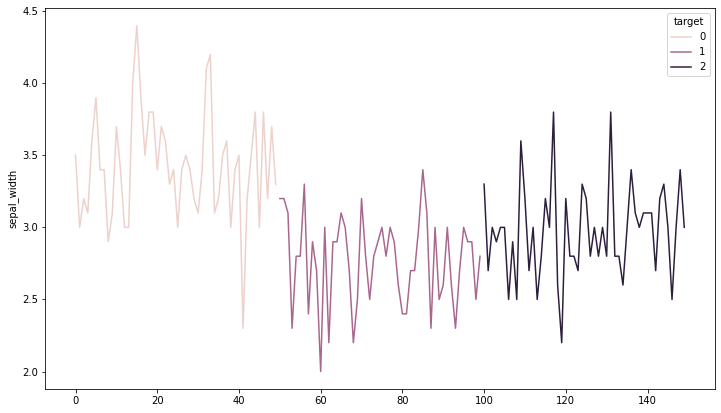

In [52]:
plt.figure(figsize=(12, 7))
sns.lineplot(x= df.index, y = df.sepal_width, hue= df.target)

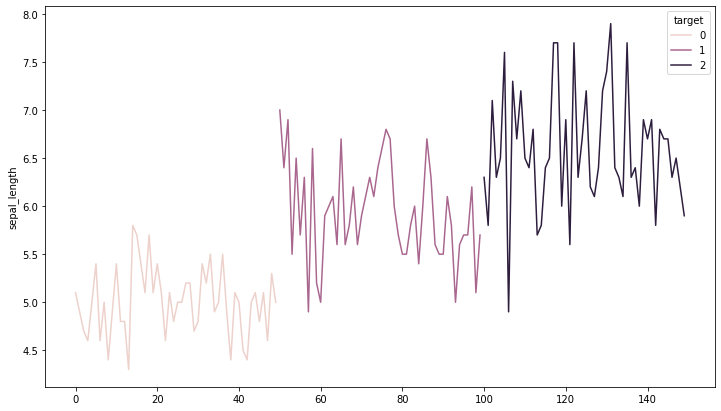

In [53]:
plt.figure(figsize=(12, 7))
sns.lineplot(x= df.index, y = df.sepal_length, hue= df.target)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_df, test_df = train_test_split(df, test_size= 0.1)

In [56]:
train_df.shape, test_df.shape

((135, 5), (15, 5))

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()

In [60]:
lr.fit(X = train_df.drop(columns=['target']),
       y = train_df.target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
lr.coef_

array([[-0.4039592 ,  0.90723903, -2.43529155, -1.05934215],
       [ 0.49265947, -0.33045647, -0.22031674, -0.87906172],
       [-0.08870026, -0.57678256,  2.65560829,  1.93840388]])

In [62]:
lr.intercept_

array([  9.65074893,   2.39234589, -12.04309482])

In [63]:
test_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target
13,4.3,3.0,1.1,0.1,0
30,4.8,3.1,1.6,0.2,0
62,6.0,2.2,4.0,1.0,1
81,5.5,2.4,3.7,1.0,1
123,6.3,2.7,4.9,1.8,2


In [64]:
lr.predict([[6.3,	2.7,	4.9,	1.8]])

array([2])

In [65]:
lr.predict_proba([[6.3,	2.7,	4.9,	1.8]])

array([[0.00079241, 0.40090232, 0.59830527]])

In [66]:
dataset.target_names[2]

'virginica'

In [67]:
lr.predict([[6.0,	2.2,	4.0,	1.0]])

array([1])

In [68]:
lr.predict_proba([[6.0,	2.2,	4.0,	1.0]])

array([[0.01149493, 0.97307816, 0.01542691]])

In [69]:
dataset.target_names[1]

'versicolor'

In [70]:
lr.predict([[4.8,	3.1,	1.6,	0.2]])	

array([0])

In [71]:
lr.predict_proba([[4.8,	3.1,	1.6,	0.2]])	

array([[9.61263676e-01, 3.87362197e-02, 1.04342683e-07]])

In [72]:
dataset.target_names[0]

'setosa'

In [74]:
# Regression - Linear R
# Classification - Logistic R